In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [7]:
import chardet

with open('Super_Store_data.csv', 'rb') as f:
    rawdata = f.read()
    result = chardet.detect(rawdata)
    print(result)

{'encoding': 'MacRoman', 'confidence': 0.7299852437311125, 'language': ''}


In [10]:
df = pd.read_csv('Super_Store_data.csv', encoding='MacRoman')

In [43]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [12]:
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1750,8237,CA-2017-102204,5/1/2017,5/6/2017,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Jacksonville,...,32216,South,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,2803.920,5,0.2,0.000
113,527,CA-2017-113558,10/21/2017,10/26/2017,Standard Class,PH-18790,Patricia Hirasaki,Home Office,United States,Lakeland,...,33801,South,FUR-CH-10003379,Furniture,Chairs,Global Commerce Series High-Back Swivel/Tilt C...,683.952,3,0.2,42.747
1187,5738,CA-2014-148614,1/20/2014,1/25/2014,Standard Class,MV-17485,Mark Van Huff,Consumer,United States,Los Angeles,...,90049,West,FUR-FU-10003194,Furniture,Furnishings,"Eldon Expressions Desk Accessory, Wood Pencil ...",19.300,2,0.0,5.790
618,2945,CA-2017-126242,11/19/2017,11/24/2017,Standard Class,MC-18100,Mick Crebagga,Consumer,United States,Los Angeles,...,90049,West,FUR-FU-10002685,Furniture,Furnishings,"Executive Impressions 13-1/2"" Indoor/Outdoor W...",18.700,1,0.0,7.106
773,3716,CA-2014-135608,12/8/2014,12/10/2014,Second Class,JK-15625,Jim Karlsson,Consumer,United States,Olympia,...,98502,West,FUR-CH-10002602,Furniture,Chairs,DMI Arturo Collection Mission-style Design Woo...,603.920,5,0.2,45.294


In [23]:
df.shape

(2121, 21)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [26]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [29]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [27]:
sns.set()

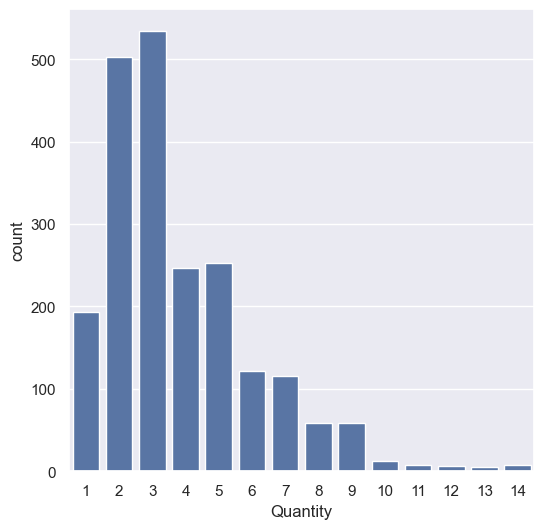

In [38]:
plt.figure(figsize=(6,6))
sns.countplot(x='Quantity', data=df)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4748\464375279.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Discount'])


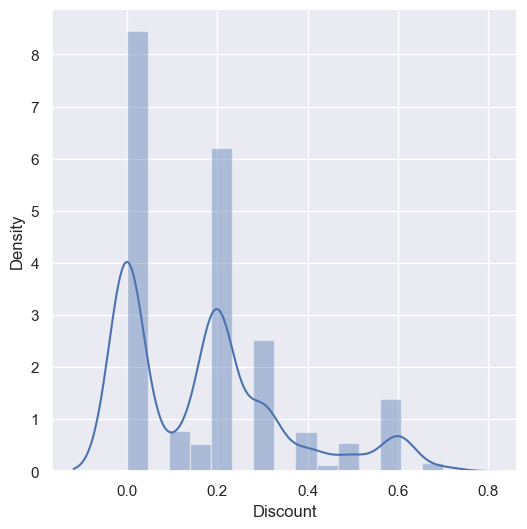

In [36]:
plt.figure(figsize=(6,6))
sns.distplot(df['Discount'])
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4748\470832092.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Profit'])


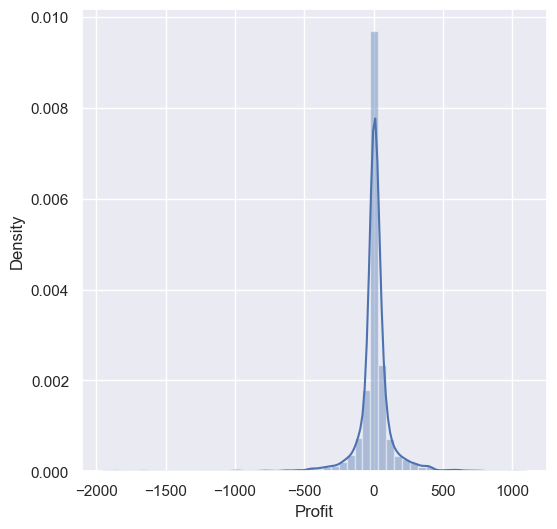

In [34]:
plt.figure(figsize=(6,6))
sns.distplot(df['Profit'])
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4748\4081038317.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


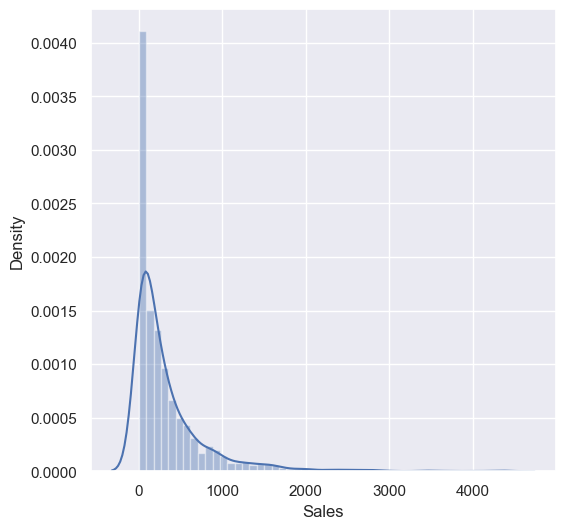

In [32]:
plt.figure(figsize=(6,6))
sns.distplot(df['Sales'])
plt.show()

In [40]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

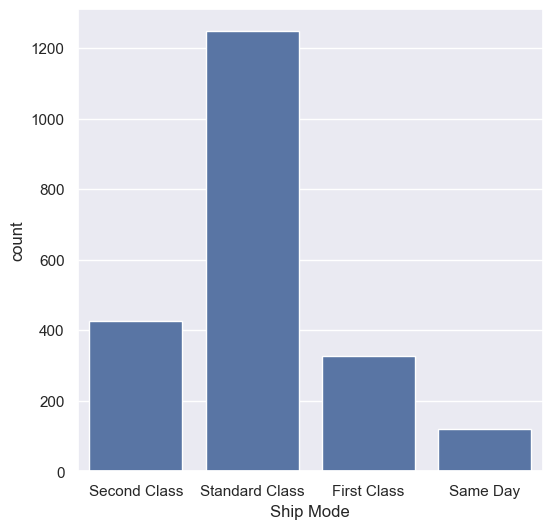

In [42]:
plt.figure(figsize=(6,6))
sns.countplot(x='Ship Mode', data=df)
plt.show()

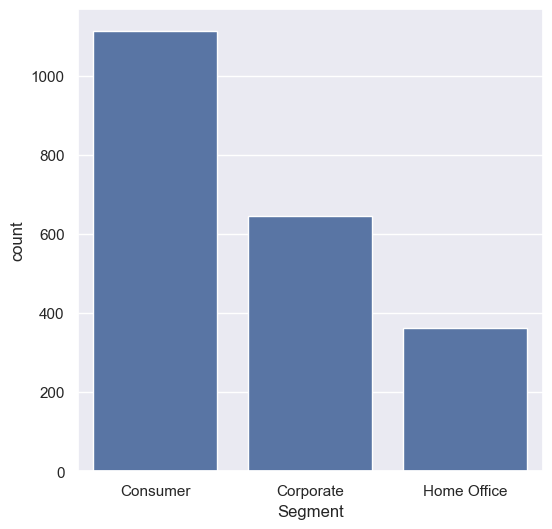

In [44]:
plt.figure(figsize=(6,6))
sns.countplot(x='Segment', data=df)
plt.show()

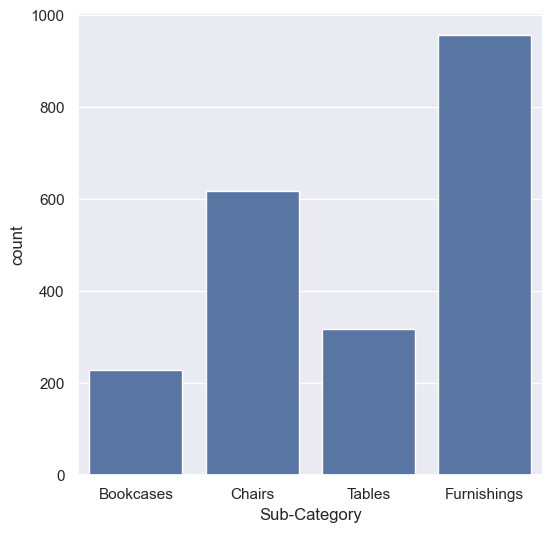

In [46]:
plt.figure(figsize=(6,6))
sns.countplot(x='Sub-Category', data=df)
plt.show()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [55]:
encoder = LabelEncoder()

In [71]:
df['Order ID'] = encoder.fit_transform(df['Order ID'])
df['Customer ID'] = encoder.fit_transform(df['Customer ID'])
df['Customer Name'] = encoder.fit_transform(df['Customer Name'])
df['Country'] = encoder.fit_transform(df['Country'])
df['City'] = encoder.fit_transform(df['City'])
df['State'] = encoder.fit_transform(df['State'])
df['Postal Code'] = encoder.fit_transform(df['Postal Code'])
df['Region'] = encoder.fit_transform(df['Region'])
df['Product ID'] = encoder.fit_transform(df['Product ID'])
df['Product Name'] = encoder.fit_transform(df['Product Name'])
df['Order Date'] = encoder.fit_transform(df['Order Date'])
df['Ship Date'] = encoder.fit_transform(df['Ship Date'])
df['Ship Mode'] = encoder.fit_transform(df['Ship Mode'])
df['Segment'] = encoder.fit_transform(df['Segment'])
df['Category'] = encoder.fit_transform(df['Category'])
df['Sub-Category'] = encoder.fit_transform(df['Sub-Category'])

In [72]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,881,229,149,2,127,147,0,0,137,...,167,2,12,0,0,52,261.9600,2,0.00,41.9136
1,2,881,229,149,2,127,147,0,0,137,...,167,2,55,0,1,225,731.9400,3,0.00,219.5820
2,4,1525,62,85,3,628,612,0,0,108,...,132,2,319,0,3,38,957.5775,5,0.45,-383.0310
3,6,72,652,638,3,79,101,0,0,184,...,370,3,185,0,2,129,48.8600,7,0.00,14.1694
4,11,72,652,638,3,79,101,0,0,184,...,370,3,328,0,3,65,1706.1840,9,0.20,85.3092


In [73]:
X = df.drop(columns='Sales', axis=1)
y = df['Sales']

In [74]:
X

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit
0,1,881,229,149,2,127,147,0,0,137,15,167,2,12,0,0,52,2,0.00,41.9136
1,2,881,229,149,2,127,147,0,0,137,15,167,2,55,0,1,225,3,0.00,219.5820
2,4,1525,62,85,3,628,612,0,0,108,8,132,2,319,0,3,38,5,0.45,-383.0310
3,6,72,652,638,3,79,101,0,0,184,3,370,3,185,0,2,129,7,0.00,14.1694
4,11,72,652,638,3,79,101,0,0,184,3,370,3,328,0,3,65,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,586,387,427,0,144,155,2,0,146,40,303,0,40,0,0,49,4,0.32,-67.6704
2117,9965,852,316,256,2,284,283,1,0,233,6,65,1,232,0,2,141,1,0.00,6.4320
2118,9981,1565,877,958,2,648,619,0,0,160,16,270,2,323,0,3,257,1,0.00,22.3548
2119,9990,48,26,29,2,658,676,0,0,206,8,131,2,200,0,2,375,3,0.20,4.1028


In [75]:
y

0        261.9600
1        731.9400
2        957.5775
3         48.8600
4       1706.1840
          ...    
2116     383.4656
2117      13.4000
2118      85.9800
2119      25.2480
2120      91.9600
Name: Sales, Length: 2121, dtype: float64

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [77]:
X_train.shape

(1696, 20)

In [78]:
y_train.shape

(1696,)

In [79]:
X_test.shape

(425, 20)

In [80]:
y_test.shape

(425,)

In [81]:
regressor = XGBRegressor()

In [82]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [83]:
training_data_pred = regressor.predict(X_train)

In [84]:
r2_train = metrics.r2_score(y_train, training_data_pred)

In [86]:
print('R Squared value = ', r2_train)

R Squared value =  0.9994405074736217


In [88]:
testing_data_pred = regressor.predict(X_test)

In [89]:
r2_test = metrics.r2_score(y_test, testing_data_pred)

In [92]:
print('R Squared value = ', r2_test)

R Squared value =  0.749112274515217


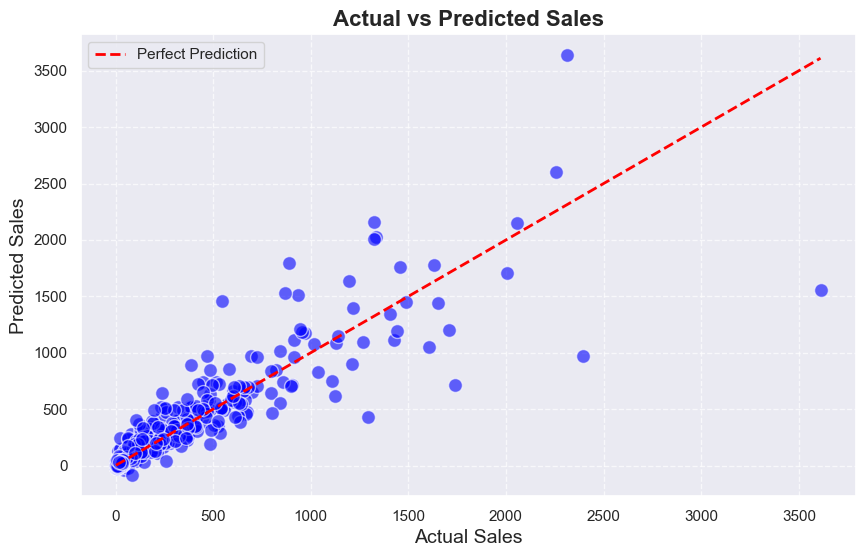

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, testing_data_pred, color='blue', alpha=0.6, edgecolors='w', s=100) 

line_range = np.linspace(min(y_test), max(y_test), 100) 
plt.plot(line_range, line_range, color='red', linestyle='--', linewidth=2, label='Perfect Prediction')  

plt.title('Actual vs Predicted Sales', fontsize=16, fontweight='bold')
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend()

plt.show()